In [43]:
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
G = nx.DiGraph()

In [106]:
G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('b','d',weight=-2.0)
G.add_edge('b','e',weight=0.7)
G.add_edge('e','f',weight=0.9)
G.add_edge('c','d',weight=0.3)
G.add_edge('b','f',weight=2.0)
G.add_edge('d', 'f', weight=0.5)

# G.add_edge('d','f',weight=0.2)



In [54]:
pos= nx.spring_layout(G) # positions for all nodes

pos['a'] = np.array([0, 1])
pos['f']  = np.array([1,0])

In [55]:
G.nodes()

['a', 'e', 'f', 'b', 'c', 'd']

In [56]:
G.edges()

[('a', 'b'),
 ('a', 'c'),
 ('e', 'f'),
 ('b', 'd'),
 ('b', 'f'),
 ('b', 'e'),
 ('c', 'd'),
 ('d', 'f')]

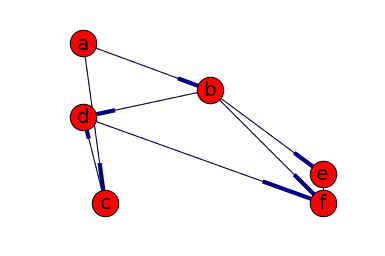

In [57]:
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edges(G,pos, alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif');


In [103]:
def belman_ford(G, source = 'a', sink='f'):
    """
    vertices: list of vertices
    edges: list of edges with accompanying weights
    source: Starting point for the graph
    """
    vertices = G.nodes()
    vertices=[source]+[i for i in vertices if i != source]
    dis=dict()
    parents=dict()
    
    for V in vertices:
        dis[V]=1000
        
    dis[source]=0
    
    
    for V in vertices:
        for U in G[V]:
            if (dis[V]+G[V][U]['weight']) < dis[U]:
                parents[U]=V
            dis[U]=min(dis[V]+G[V][U]['weight'], dis[U])
            
    parents[source]=source
    path=[]
    sink1=sink
#     n=len(vertices)
#     vertices.remove(source)
    
#     while(n>1):
#         for V in vertices:
#             if V== parents[sink1]:
#                 path=path+[V]
#                 sink1=V
#         n=n-1
               
    while( sink1 != source):
        for V in vertices:
            if V== parents[sink1]:
                path=path+[V]
                sink1=V
    
    path=path[::-1]
    return dis[sink], path

In [104]:
belman_ford(G,"a",'f')

(-0.8999999999999999, ['a', 'b', 'd'])

In [88]:
vertices = G.nodes()
edges = G.edges()
vertices, edges

(['a', 'e', 'f', 'b', 'c', 'd'],
 [('a', 'b'),
  ('a', 'c'),
  ('e', 'f'),
  ('b', 'd'),
  ('b', 'f'),
  ('b', 'e'),
  ('c', 'd'),
  ('d', 'f')])

In [115]:
G['a']['b']['weight']

0.6

In [109]:
type(G['a'])

dict

In [ ]:
G.

In [110]:
type(G)

networkx.classes.digraph.DiGraph

In [28]:
vertices

['a', 'e', 'f', 'b', 'c', 'd']